Monte Carlo with 100 trials: Probability = 0.000000
Monte Carlo with 1000 trials: Probability = 0.002000
Monte Carlo with 10000 trials: Probability = 0.002200
Monte Carlo with 50000 trials: Probability = 0.001900
Monte Carlo with 100000 trials: Probability = 0.001910

Exact probability: 0.001893


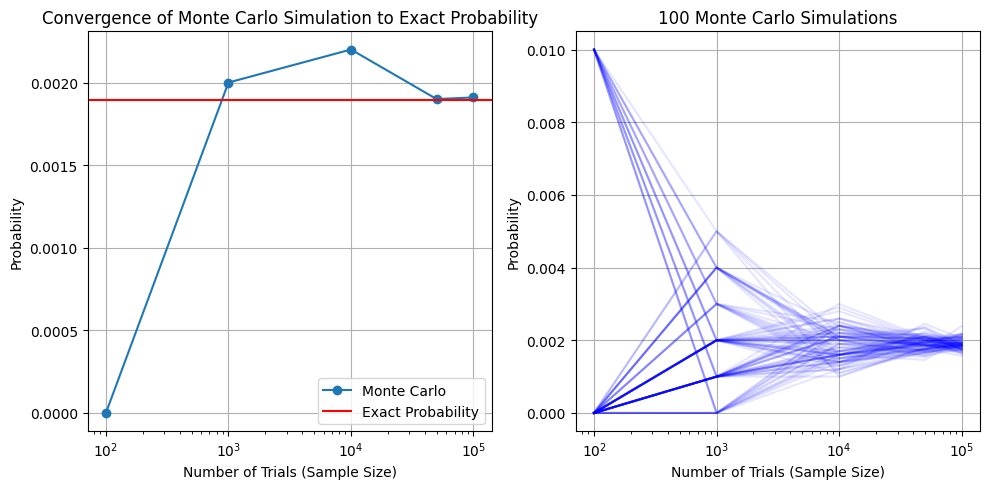

In [5]:
import random
import matplotlib.pyplot as plt
from math import comb

def monte_carlo_marbles(num_trials):
    """
    Performs the Monte Carlo simulation for the marble problem.

    Args:
        num_trials: The number of trials to run in the simulation.

    Returns:
        The estimated probability that all 5 drawn marbles are blue.
    """
    successful_trials = 0
    for _ in range(num_trials):
        # Create the urn with marbles
        urn = ['red'] * 20 + ['blue'] * 30 + ['green'] * 50

        # Draw 5 marbles randomly without replacement
        drawn_marbles = random.sample(urn, 5)

        # Check if all drawn marbles are blue
        if all(marble == 'blue' for marble in drawn_marbles):
            successful_trials += 1

    return successful_trials / num_trials

def exact_probability():
    """
    Calculates the exact probability of drawing 5 blue marbles.

    Returns:
        The exact probability.
    """
    return comb(30, 5) / comb(100, 5)

# --- First Plot: Convergence of Monte Carlo to Exact Probability ---
sample_sizes = [100, 1000, 10000, 50000, 100000]
mc_probabilities = []

for size in sample_sizes:
    prob = monte_carlo_marbles(size)
    mc_probabilities.append(prob)
    print(f"Monte Carlo with {size} trials: Probability = {prob:.6f}")

exact_prob = exact_probability()
print(f"\nExact probability: {exact_prob:.6f}")

plt.figure(figsize=(10, 5))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Create a subplot for the first plot (1 row, 2 columns, first plot)
plt.plot(sample_sizes, mc_probabilities, marker='o', label='Monte Carlo')
plt.axhline(y=exact_prob, color='r', linestyle='-', label='Exact Probability')
plt.xscale('log')
plt.xlabel('Number of Trials (Sample Size)')
plt.ylabel('Probability')
plt.title('Convergence of Monte Carlo Simulation to Exact Probability')
plt.legend()
plt.grid(True)

# --- Second Plot: 100 Monte Carlo Simulations ---
plt.subplot(1, 2, 2)  # Create a subplot for the second plot (1 row, 2 columns, second plot)
num_simulations = 100
for _ in range(num_simulations):
    mc_probabilities = []
    for size in sample_sizes:
        prob = monte_carlo_marbles(size)
        mc_probabilities.append(prob)
    plt.plot(sample_sizes, mc_probabilities, color='blue', alpha=0.1)  # Transparent lines

plt.xscale('log')
plt.xlabel('Number of Trials (Sample Size)')
plt.ylabel('Probability')
plt.title('100 Monte Carlo Simulations')
plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()